## Opening the Data

In [4]:
import json

N = 1500
date = '2018-08-27'
name = 'atp_python_' + date + '_1-' + str(N) + '.json'

with open(name) as d:
    players = [json.loads(line) for line in d]

## Height and Weight vs Prize Study

In [16]:
study = []

for i in range(0, len(players)):
    if 'height' in players[i].keys():
        if 'weight' in players[i].keys():
            if 'prize' in players[i].keys():
                rank = i + 1
                height = players[i]['height']
                weight = players[i]['weight']
                prize = players[i]['prize']
                
                # Taking out the weird zeros
                if height >= 50 and weight >= 50:
                    study.append([rank, height, weight, prize])

## Prize vs Rank

Text(0.5,1,'Prize x Rank')

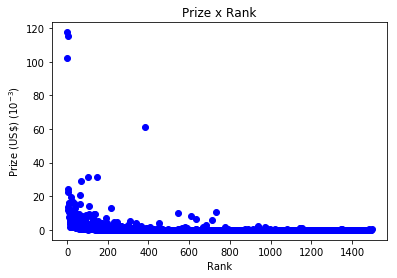

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# With the filthy rich
prize = [i/10**6 for _,_,_,i in study]
weight = [j for _,_,j,_ in study]
rank = [k for k,_,_,_ in study]

plt.scatter(rank, prize, color = ['blue'])
plt.xlabel('Rank')
plt.ylabel('Prize (US\$) ($10^{-3}$)')
plt.title('Prize x Rank')
# plt.savefig('prize_vs_rank_with_rich.jpeg')

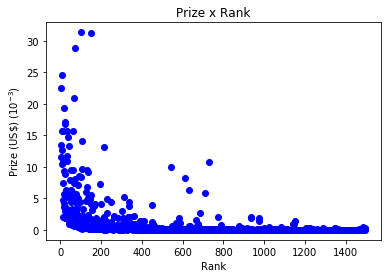

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Getting the filthy rich out
cap = 40*10**6
study_NFR = [[i,j,k,l] for i,j,k,l in study if l < cap]

prize = [i/10**6 for _,_,_,i in study_NFR]
weight = [j for _,_,j,_ in study_NFR]
rank = [k for k,_,_,_ in study_NFR]

plt.scatter(rank, prize, color = ['blue'])
plt.xlabel('Rank')
plt.ylabel('Prize (US\$) ($10^{-3}$)')
plt.title('Prize x Rank')
plt.savefig('prize_vs_rank.jpeg')

## Sum of Prizes vs Rank

Text(0.5,1,'Sum of Prizes x Rank (Total Sum = 1.43 billion)')

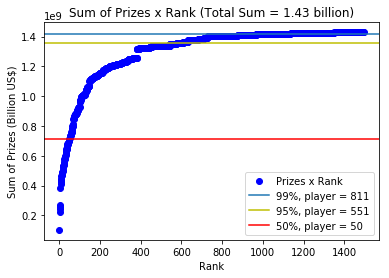

In [139]:
def prize_sum(n):    
    prize_sum = 0
    for i in range(0, n+1):
        prize_sum += study[i][3]
    return prize_sum

def find_player_sum(percentile, prize_list):
    for i in range(0, len(prize_list)):
        if prize_list[i] >= percentile*prize_list[-1]:
            return i
    return i

prize_sum_all = []
for i in range(0,len(study)):
    prize_sum_all.append(prize_sum(i))
    
cap_99 = 0.99*prize_sum_all[-1]
player_99 = find_player_sum(0.99, prize_sum_all)
cap_95 = 0.95*prize_sum_all[-1]
player_95 = find_player_sum(0.95, prize_sum_all)
cap_50 = 0.50*prize_sum_all[-1]
player_50 = find_player_sum(0.5, prize_sum_all)
    
rank = [k for k,_,_,_ in study]

main_curve = plt.scatter(rank, prize_sum_all, color = ['blue'], label = 'Prizes x Rank')
curve_99 = plt.axhline(y = cap_99, label = f'99%, player = {player_99}')
curve_95 = plt.axhline(y = cap_95, label = f'95%, player = {player_95}', color = 'y')
curve_50 = plt.axhline(y = cap_50, label = f'50%, player = {player_50}', color = 'r')
plt.legend(handles = [main_curve, curve_99, curve_95, curve_50])
plt.xlabel('Rank')
plt.ylabel('Sum of Prizes (Billion US$)')
plt.title(f'Sum of Prizes x Rank (Total Sum = {round(prize_sum_all[-1]/10**9,2)} billion)')
# plt.savefig('sum_prize_vs_rank.jpeg')

## Histogram of Weight and Height

Text(0,0.5,'Number of Players')

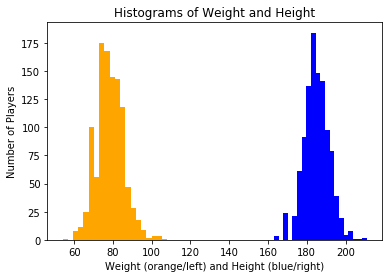

In [104]:
height = [i for _,i,_,_ in study]
weight = [j for _,_,j,_ in study]
rank = [k for k,_,_,_ in study]

n_bins = 20

height_hist = plt.hist(height, bins = n_bins, color = ['blue'], label = 'Height')
weight_hist = plt.hist(weight, bins = n_bins, color = ['orange'], label = 'Weight')
# plt.legend(handles = [height_hist, weight_hist])
plt.title('Histograms of Weight and Height')
plt.xlabel('Weight (orange/left) and Height (blue/right)')
plt.ylabel('Number of Players')
# plt.savefig('histogram_weight_height.jpeg')

## Scatter of Weight and Height

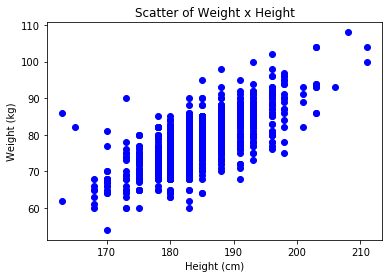

In [106]:
height = [i for _,i,_,_ in study]
weight = [j for _,_,j,_ in study]
rank = [k for k,_,_,_ in study]

plt.scatter(height, weight, color = ['blue'])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter of Weight x Height')
# plt.savefig('scatter_weight_height.png', transparent = True)

## Scatter of Weight vs Height, with Millionaires Highlighted

Text(0.5,1,'Scatter of Weight x Height')

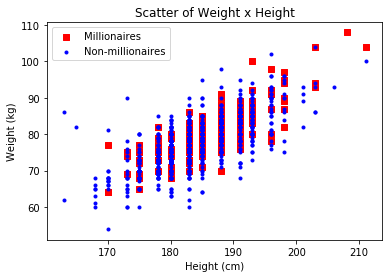

In [110]:
big_prize = 1*10**6

height_M = [i for _,i,_,k in study if k >= big_prize]
weight_M = [i for _,_,i,k in study if k >= big_prize]

height_NM = [i for _,i,_,k in study if k < big_prize]
weight_NM = [i for _,_,i,k in study if k < big_prize]

labels = ['>1M' if k >= 10**6 else '<1M' for _,_,_,k in study]

millionaires = plt.scatter(height_M, weight_M, color = ['red'], 
                           marker = ',', label = 'Millionaires')
n_millionaires = plt.scatter(height_NM, weight_NM, color = ['blue'], 
                             marker = '.', label = 'Non-millionaires')
plt.legend(handles = [millionaires, n_millionaires])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter of Weight x Height')
# plt.savefig('scatter_weight_height_millionaires.jpeg')

## 2D Histogram of Weight and Height

Text(0,0.5,'Weight')

C:\Users\Philippe\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


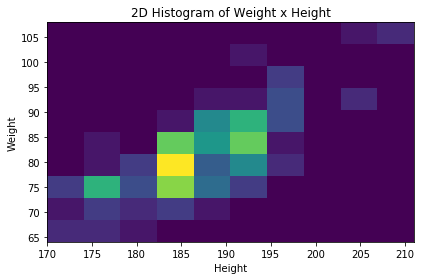

In [84]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(height_M, weight_M)
plt.title('2D Histogram of Weight x Height')
plt.xlabel('Height')
plt.ylabel('Weight')
# plt.savefig('2D_histogram_weight_height.jpeg')

## ML Classification of the Players

In [168]:
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from random import shuffle

def predict_M(players, M, N):
    # Given a Height and a Weight, is the player gonna get more or less
    # than 1,000,000?
    # study := [rank, height, weight, prize]
    pred_svm_me = []
    
    acc_tree, acc_svm, acc_neigh, acc_gauss = [], [], [], []

    for i in range(1, N+1):

        study_shuffled = players[:]
        shuffle(study_shuffled)
        study_HW = [[i,j] for _,i,j,_ in study_shuffled]
        study_M = ['>1M' if k >= M else '<1M' for _,_,_,k in study_shuffled]

        test_size = int(0.1*len(study_HW))

        # Train Set
        study_HW_train = study_HW[0:(len(study_M)-test_size)]
        study_M_train = study_M[0:(len(study_M)-test_size)]

        # Test Set
        study_HW_test = study_HW[(len(study_M)-test_size):(len(study_M)+1)]
        study_M_test = study_M[(len(study_M)-test_size):(len(study_M)+1)]

        # Creating the Classifiers
        clf_tree = tree.DecisionTreeClassifier()
        clf_svm = svm.SVC()
        clf_neigh = neighbors.KNeighborsClassifier()
        clf_gauss = GaussianNB()

        # Fitting
        clf_tree = clf_tree.fit(study_HW_train, study_M_train)
        clf_svm = clf_svm.fit(study_HW_train, study_M_train)
        clf_neigh = clf_neigh.fit(study_HW_train, study_M_train)
        clf_gauss = clf_gauss.fit(study_HW_train, study_M_train)

        # Predicting with the Test Set
        pred_tree = clf_tree.predict(study_HW_test)
        pred_svm = clf_svm.predict(study_HW_test)
        pred_neigh = clf_neigh.predict(study_HW_test)
        pred_gauss = clf_gauss.predict(study_HW_test)
        
        pred_svm_me.append(clf_svm.predict([[173,62]]))
        # Checking the Accuracy with the Test Set
        acc_tree.append(accuracy_score(study_M_test, pred_tree))
        acc_svm.append(accuracy_score(study_M_test, pred_svm))
        acc_neigh.append(accuracy_score(study_M_test, pred_neigh))
        acc_gauss.append(accuracy_score(study_M_test, pred_gauss))
        
    # Calculating the averages
    avg_tree = np.mean(acc_tree)
    avg_svm = np.mean(acc_svm)
    avg_neigh = np.mean(acc_neigh)
    avg_gauss = np.mean(acc_gauss)
    
    # Calculating the variances
    var_tree = np.var(acc_tree)
    var_svm = np.var(acc_svm)
    var_neigh = np.var(acc_neigh)
    var_gauss = np.var(acc_gauss)
    
    return [[avg_tree, avg_svm, avg_neigh, avg_gauss], 
            [var_tree, var_svm, var_neigh, var_gauss],
           pred_svm_me]

# The accuracy of these models is terrible...
# The tree is only geting 38%. Maybe more data (I have <200) could help...
# And indeed it does!

result = predict_M(study, 10**6, 10)

print('   Average Accuracy\n',
      f'   Acc Tree: {result[0][0]}\n',
      f'   Acc SVM: {result[0][1]}\n',
      f'   Acc Neigh: {result[0][2]}\n',
      f'   Acc Gauss: {result[0][3]}')

print('   Variance of the Accuracy\n',
      f'   Var Tree: {result[1][0]}\n',
      f'   Var SVM: {result[1][1]}\n',
      f'   Var Neigh: {result[1][2]}\n',
      f'   Var Gauss: {result[1][3]}')

   Average Accuracy
    Acc Tree: 0.8018867924528301
    Acc SVM: 0.8292452830188679
    Acc Neigh: 0.8122641509433961
    Acc Gauss: 0.8311320754716981
   Variance of the Accuracy
    Var Tree: 0.0025631897472410134
    Var SVM: 0.002482200071199716
    Var Neigh: 0.001823602705589179
    Var Gauss: 0.0021084015663937333


In [169]:
result[2]

[array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3'),
 array(['<1M'], dtype='<U3')]